In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./telco_churn.csv')

# EDA

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

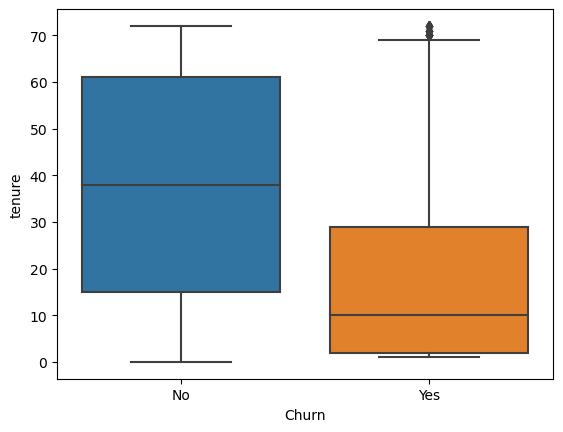

In [71]:
sns.boxplot(data=df, y='tenure', x='Churn')

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

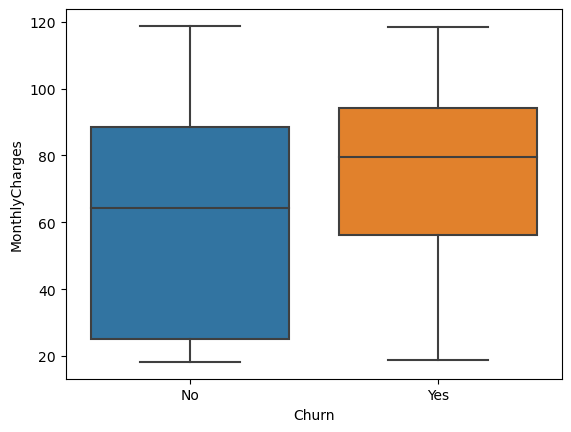

In [72]:
sns.boxplot(data=df, y='MonthlyCharges', x='Churn')

In [35]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan,regex=True)
df["TotalCharges"].value_counts()

20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [36]:
df["TotalCharges"] = df["TotalCharges"].astype("float")

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

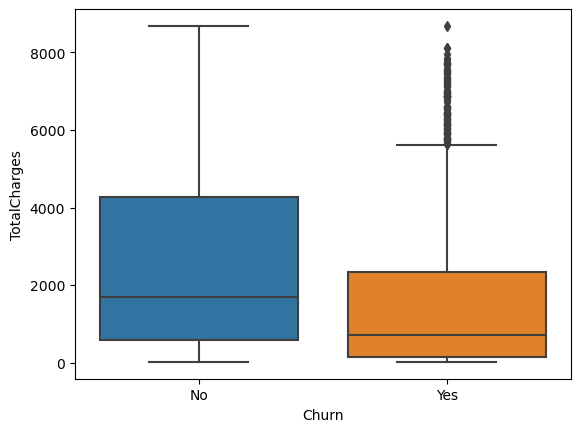

In [37]:
sns.boxplot(data=df, y='TotalCharges', x='Churn')

c:\Users\henri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\henri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\henri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\henri\anaconda3\lib\si

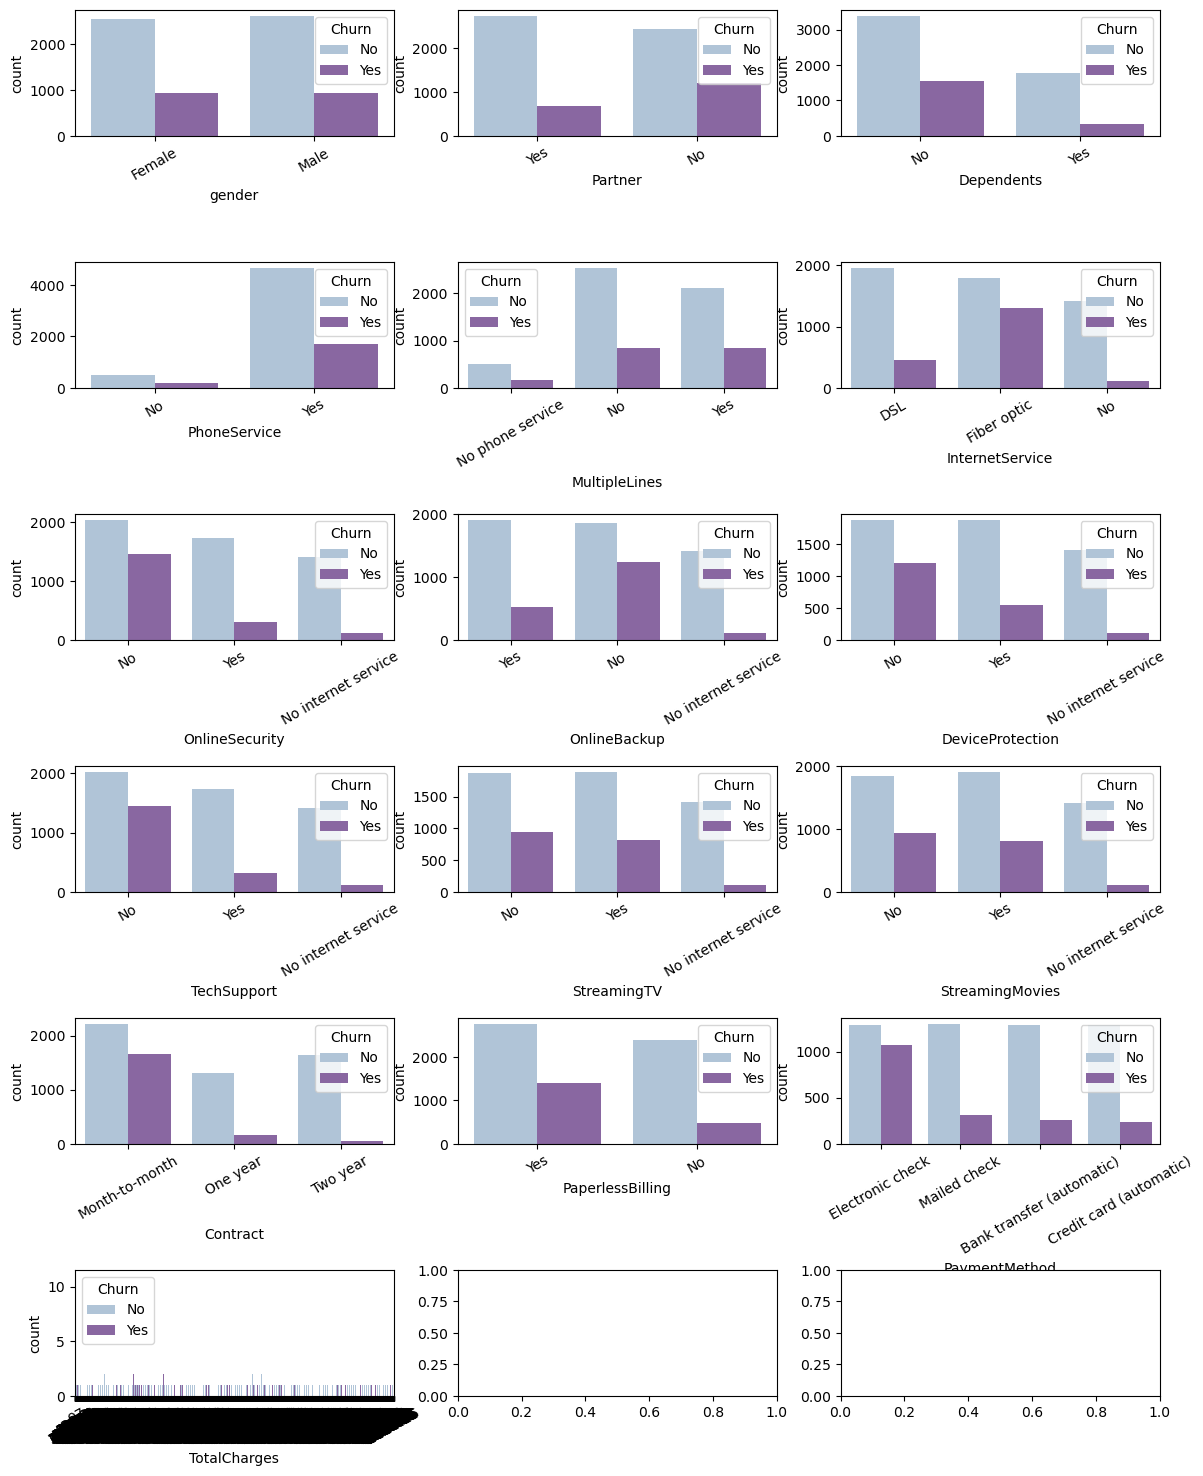

In [82]:
cat = [
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod'
]

fig , ax = plt.subplots(4,3,figsize = (14,18))
for i , subplots in zip (df[cat], ax.flatten()):  
  plot = sns.countplot(df[cat][i],hue = df['Churn'], ax = subplots, palette = 'BuPu')
  plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
plt.subplots_adjust(hspace=1)
plt.show()

# Feature Engineering

In [3]:
def calc_family_size(dataframe):
    if dataframe['Partner']=='Yes' and dataframe['Dependents']=='Yes':
        return 'big_family'
    elif dataframe['Partner']=='Yes' and dataframe['Dependents']=='No':
        return 'no_child'
    elif dataframe['Partner']=='No' and dataframe['Dependents']=='Yes':
        return 'single_parent'
    elif dataframe['Partner']=='No' and dataframe['Dependents']=='No':
        return 'no_family'
    else:
        return 'others'

df['family_size'] = df.apply(calc_family_size, axis=1)

In [46]:
def calc_service_profile(dataframe):

    if (dataframe['MultipleLines'] == 'No phone service') & (dataframe['InternetService'] == 'No'):
        return 'Not a customer'
    elif (dataframe['MultipleLines'] != 'No phone service') & (dataframe['InternetService'] == 'No'):
        return 'only_phone'
    elif (dataframe['MultipleLines'] == 'No phone service') & (dataframe['InternetService'] != 'No'):
        return 'only_internet'
    elif (dataframe['MultipleLines'] != 'No phone service') & (dataframe['InternetService'] != 'No'):
        return 'phone_and_internet'
    else:
        return 'others'

df['service_profile'] = df.apply(calc_service_profile, axis=1)

In [ ]:
def calc_customer_service(dataframe):

    if (dataframe['OnlineBackup'] == 'Yes') & (dataframe['TechSupport'] == 'Yes'):
        return 'Full Support'
    elif (dataframe['OnlineBackup'] == 'Yes') & (dataframe['TechSupport'] == 'No'):
        return 'only_phone'
    elif (dataframe['OnlineBackup'] == 'Yes') & (dataframe['TechSupport'] == 'Yes'):
        return 'only_internet'
    elif (dataframe['OnlineBackup'] == 'Yes') & (dataframe['TechSupport'] == 'Yes'):
        return 'phone_and_internet'
    else:
        return 'others'

df['service_profile'] = df.apply(calc_service_profile, axis=1)

In [51]:
def calc_security_level(dataframe):

    if (dataframe['OnlineSecurity'] == 'No internet service') & (dataframe['DeviceProtection'] == 'No internet service'):
        return 'No internet service'
    elif (dataframe['OnlineSecurity'] == 'Yes') & (dataframe['DeviceProtection'] == 'Yes'):
        return 'strong security'
    elif ((dataframe['OnlineSecurity'] == 'No') & (dataframe['DeviceProtection'] == 'Yes') | (dataframe['OnlineSecurity'] == 'Yes') & (dataframe['DeviceProtection'] == 'No')):
        return 'mid security'
    elif (dataframe['OnlineSecurity'] == 'No') & (dataframe['DeviceProtection'] == 'No'):
        return 'no security'
    else:
        return 'others'

df['security_level'] = df.apply(calc_security_level, axis=1)

In [52]:
def calc_streaming_profile(dataframe):

    if (dataframe['StreamingTV'] == 'No internet service') & (dataframe['StreamingMovies'] == 'No internet service'):
        return 'No internet service'
    elif (dataframe['StreamingTV'] == 'Yes') & (dataframe['StreamingMovies'] == 'Yes'):
        return 'Movies and TV'
    elif ((dataframe['StreamingTV'] == 'No') & (dataframe['StreamingMovies'] == 'Yes') | (dataframe['StreamingTV'] == 'Yes') & (dataframe['StreamingMovies'] == 'No')):
        return 'only one'
    elif (dataframe['StreamingTV'] == 'No') & (dataframe['StreamingMovies'] == 'No'):
        return 'no streaming'
    else:
        return 'others'

df['streaming_profile'] = df.apply(calc_streaming_profile, axis=1)

In [54]:
def calc_billing_profile(dataframe):

    if (dataframe['PaymentMethod'] == 'Electronic check'):
        return 'Electronic check'
    elif (dataframe['PaymentMethod'] == 'Mailed check'):
        return 'Mailed check'
    elif (dataframe['PaymentMethod'] == 'Bank transfer (automatic)'):
        return 'Bank transfer (automatic)'
    elif (dataframe['PaymentMethod'] == 'Credit card (automatic)'):
        return 'Credit card (automatic)'
    else:
        return 'PaperlessBilling'

df['billing_profile'] = df.apply(calc_billing_profile, axis=1)

In [56]:
def calc_tenure_cat(dataframe):

    if (dataframe['tenure'] < 3):
        return '[0,3)'
    elif (dataframe['tenure'] < 6):
        return '[3,6)'
    elif (dataframe['tenure'] < 12):
        return '[6,12)'
    elif (dataframe['tenure'] < 24):
        return '[12,24)'
    elif (dataframe['tenure'] < 36):
        return '[24,36)'
    else:
        return '[36,inf)'

df['tenure_cat'] = df.apply(calc_tenure_cat, axis=1)

In [57]:
def calc_monthly_charges_cat(dataframe):

    if (dataframe['MonthlyCharges'] < 20):
        return '[0,20)'
    elif (dataframe['MonthlyCharges'] < 40):
        return '[20,40)'
    elif (dataframe['MonthlyCharges'] < 60):
        return '[40,60)'
    elif (dataframe['MonthlyCharges'] < 80):
        return '[60,80)'
    elif (dataframe['MonthlyCharges'] < 100):
        return '[80,100)'
    else:
        return '[100,inf)'

df['monthly_charges_cat'] = df.apply(calc_monthly_charges_cat, axis=1)

# Model